In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [247]:
#red points in Bishop
#mu1 = [1.5, -2]  
mu1 = [3.9, 1.5]
cov1 = [[0.8596, 0.1502], [0.1502, 0.3397]]
sample1 = np.random.multivariate_normal(mu1, cov1, 200) #class1

In [248]:
#blue points in Bishop
mu2 = [1, 2.8]  
cov2 = [[0.8596, 0.1502], [0.1502, 0.3397]]

sample2 = np.random.multivariate_normal(mu2, cov2, 200) #class2


In [249]:
#print(sample1)

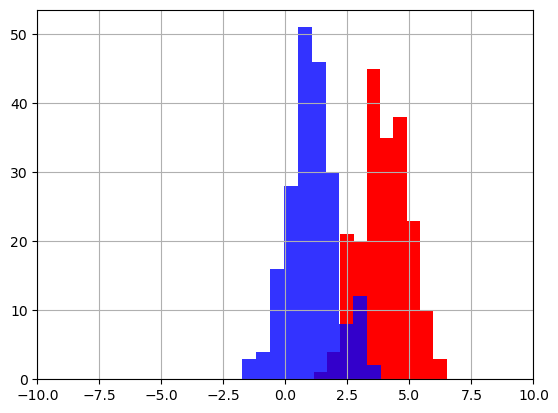

In [250]:
plt.hist(sample1[:, 0], color='red')
plt.hist(sample2[:,0], color='blue', alpha=0.8)
plt.xlim(-10, 10)
plt.grid()
plt.show()

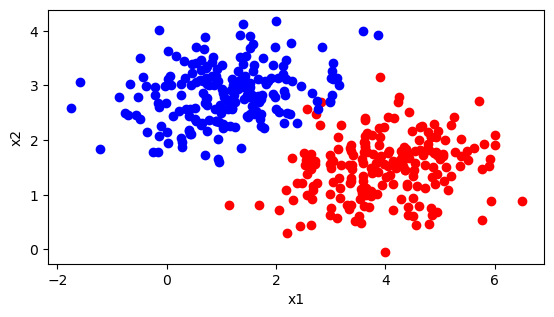

In [251]:
#correlation between samples from two classes (red and blue) in the 2D input space
# sample1 = 1st class and sample2 = 2nd class
plt.scatter(sample1[:,0], sample1[:,1], color='red')
plt.scatter(sample2[:,0], sample2[:,1], color='blue')
plt.xlabel("x1")
plt.ylabel("x2")
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [267]:
X = np.append(sample1, sample2, axis=0) # X = [X1, X2] = [X1, X2] from sample1 and sample2 are stacked together = (row = N, column = 2)
# = np.append[(row = N/2, column = 2), (row = N/2, column = 2)]
#print(X)
Y = np.append([1 for points in sample1], [-1 for points in sample2], axis=0) # Y = (row = N, column = 2) = target vector

In [253]:
print(len(Y))
print(len(X))

400
400


In [234]:
#training and test set (75% training set and 25% test set for predictive analysis 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
sample1_train = X_train[Y_train == 1]  # Extract points where Y_train == 1
sample2_train = X_train[Y_train == -1]  # Extract points where Y_train == -1
# Adding a column as the "Target" i.e. the predicted value for y
#x1_x2_train = np.append(x1_train, x2_train, axis=0)
#x1_x2_test = np.append(x1_test, x2_test, axis=0)
#targets = np.append([1 for points in X[:,0]], [-1 for points in X[:,1]], axis=0)
#len(x1_x2_test)
#len(x1_train), len(x2_train)
#len(x1_test), len(x2_test)

TypeError: Input z must be 2D, not 1D

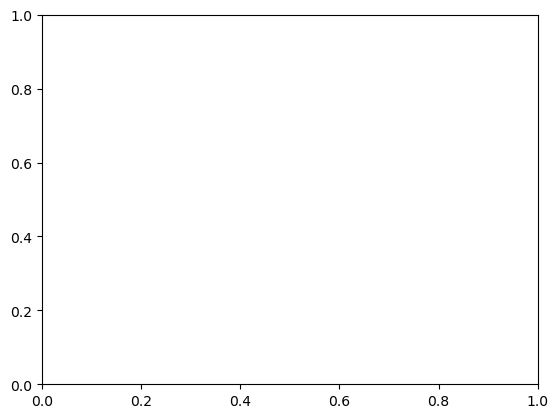

In [274]:
#Least Squares Discriminant 
X_train_augmented = np.hstack([X_train, np.ones((X_train.shape[0], 1))])  # Add bias term
w = np.linalg.pinv(X_train_augmented).dot(Y_train)  # Compute weight vector using least squares

# Make predictions
X_test_augmented = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
Y_pred = np.sign(X_test_augmented.dot(w))  # Predict using sign function


# Visualization of decision boundary
xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 1000),
                     np.linspace(X[:, 1].min(), X[:, 1].max(), 1000))
grid_points = np.c_[xx.ravel(), yy.ravel()]
grid_points_augmented = np.hstack([grid_points, np.ones((grid_points.shape[0], 1))])
Z = np.sign(grid_points_augmented @ w)
Z = Z.reshape(xx.shape)

# Plotting
plt.contour(X_test, Y_test, Y_pred, levels=[0], linewidths=2)
#plt.contour(xx, yy, Z, levels=[0], linewidths=2)
plt.scatter(sample1[:, 0], sample1[:, 1], color='red', label='Class 1')
plt.scatter(sample2[:, 0], sample2[:, 1], color='blue', label='Class 2')
plt.legend(frameon = False)
plt.show()

In [235]:
regr = LinearRegression() 
regr.fit(X_train, Y_train) 
class_pred = regr.predict(X_test)
#print(class_pred)

In [236]:
coefficient = regr.coef_
intercept = regr.intercept_
print(coefficient, intercept)

[ 0.37879023 -0.45620686] 0.05513129555019977


In [237]:
x1_1D = np.linspace(-7, 7, 1000)
x2_1D = np.linspace(-8, 8, 1000)
#len(x1_1D)
#len(x2_1D)
x1_x2_2D = np.append(x1_1D, x2_1D, axis=0)

### $y(x1, x2) = m1 \times x1 + m2 \times x2 + b$ - hyperplane
### in the $x1-x2$ plane $y = 0$ and it will be a line 
### equation of line $\Rightarrow \frac{x1}{(-b/m1)} + \frac{x2}{(-b/m2)} = 1$
### for plotting in x1-x2 space x-axis will be $x1$ values and corresponding values for $x2 = -\frac{b}{m2} - \frac{m1 \times x1}{m2}$
### will be y-axis

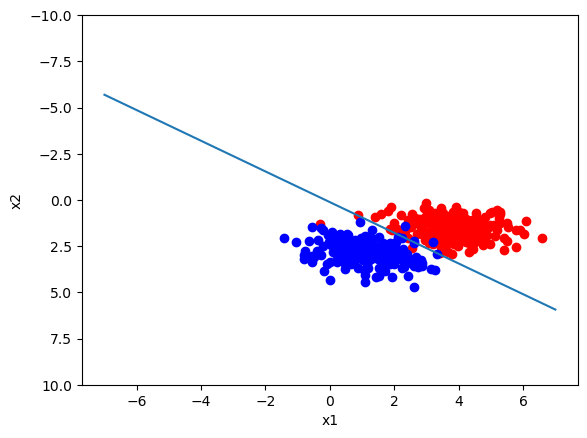

In [238]:
plt.plot(x1_1D, -intercept/coefficient[1] - coefficient[0] * x1_1D/coefficient[1]) 
plt.scatter(sample1[:,0], sample1[:,1], color='red')
plt.scatter(sample2[:,0], sample2[:,1], color='blue')
plt.xlabel("x1")
plt.ylabel("x2")
plt.ylim(10, -10)
plt.show()

## Fisher Discriminant

### Weight vector becomes (Bishop's 4.30 equation) $\textbf{w} \propto \textbf{S}^{-1}_w (\textbf{m2} - \textbf{m1})$
### where, 
### $\textbf{S}_w = \sum_{n \in \textit{C}_1} (\textbf{x}_n - \textbf{m}_1)(\textbf{x}_n - \textbf{m}_1)^T + \sum_{n \in \textit{C}_2} (\textbf{x}_n - \textbf{m}_2)(\textbf{x}_n - \textbf{m}_2)^T$ (Bishop's 4.28 equation)
### $\textbf{m}_1 = \frac{1}{N_1} \sum_{n \in \textit{C}_1} \textbf{x}_n$ (Bishop's 4.21 equation)
### $\textbf{m}_2 = \frac{1}{N_2} \sum_{n \in \textit{C}_2} \textbf{x}_n$ (Bishop's 4.21 equation)

In [239]:
m1 = np.mean(sample1, axis=0) #mean column wise (row = 1, column = 2)
m2 = np.mean(sample2, axis=0) #mean column wise (row = 1, column = 2)

In [240]:
S_m1 = np.dot((sample1 - m1).T, (sample1 - m1))
S_m2 = np.dot((sample2 - m2).T, (sample2 - m2))
S_w = S_m1 + S_m2
print(S_w)
w = np.dot(np.linalg.inv(S_w), (m2 - m1).reshape(-1,1))
print(w)

[[354.27705603  52.93065649]
 [ 52.93065649 142.8291903 ]]
[[-0.00957652]
 [ 0.01269508]]


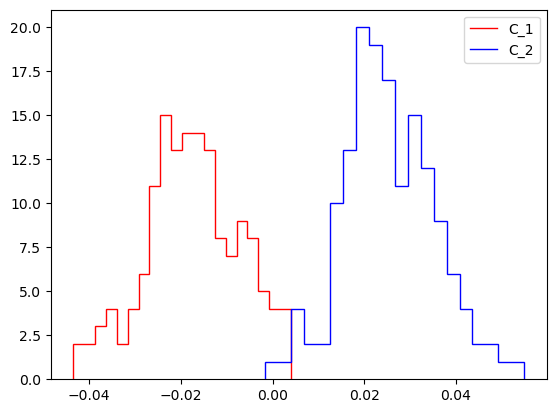

In [241]:
fig = plt.figure()
counts_1, bins_1 = np.histogram(np.array([i.dot(w) for i in sample1_train]), bins=20)
counts_2, bins_2 = np.histogram(np.array([i.dot(w) for i in sample2_train]), bins=20)
plt.stairs(counts_1, bins_1, color="red", label="C_1")
plt.stairs(counts_2, bins_2, color="blue", label="C_2")
plt.legend()

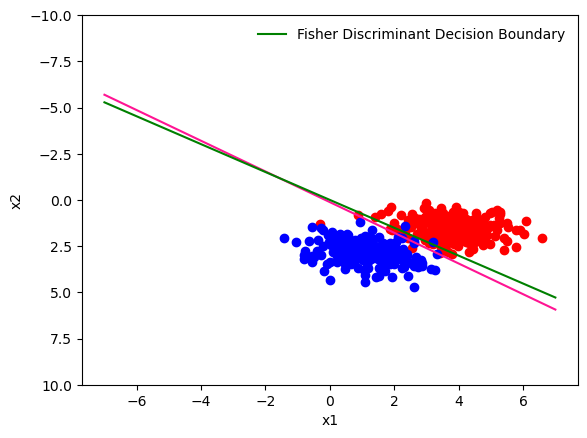

In [242]:
plt.plot(x1_1D, -intercept/coefficient[1] - coefficient[0] * x1_1D/coefficient[1], color="deeppink") 
plt.plot(x1_1D, -x1_1D * w[0]/w[1] + 0/w[1], label="Fisher Discriminant Decision Boundary", color="green")
plt.scatter(sample1[:,0], sample1[:,1], color='red')
plt.scatter(sample2[:,0], sample2[:,1], color='blue')
plt.xlabel("x1")
plt.ylabel("x2")
plt.ylim(10, -10)
plt.legend(frameon=False)
plt.show()